Upload your '2. Diagnose Diabetes.csv' file...


Saving 2. Diagnose Diabetes.csv to 2. Diagnose Diabetes.csv
First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


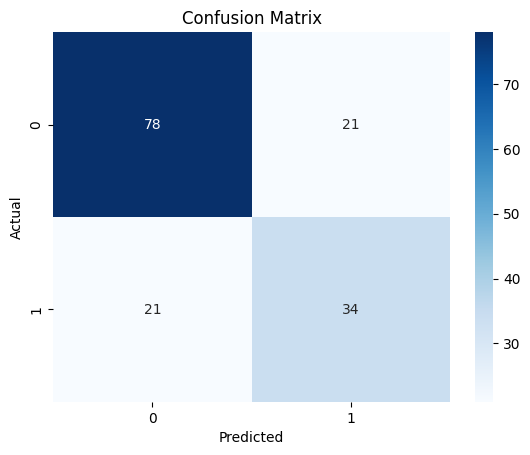

Accuracy: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.79      0.79        99
           1       0.62      0.62      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [3]:
# STEP 1: Install required libraries
!pip install pandas scikit-learn seaborn matplotlib

# STEP 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from google.colab import files

# STEP 3: Upload your CSV file
print("Upload your '2. Diagnose Diabetes.csv' file...")
uploaded = files.upload()

# STEP 4: Load CSV file
filename = "2. Diagnose Diabetes.csv"  # Make sure file name matches
df = pd.read_csv(filename)

# STEP 5: Display basic info
print("First 5 rows:")
print(df.head())

# STEP 6: Convert to numeric (if needed) and clean
df = df.apply(pd.to_numeric, errors='coerce')
df.dropna(inplace=True)

# STEP 7: Prepare features and labels
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# STEP 8: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# STEP 9: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# STEP 10: Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# STEP 11: Evaluation
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
